<a href="https://colab.research.google.com/github/m-hossni/Tensorflow-and-Keras-INFO-6146-F24/blob/main/project%20files/Jack_LinearRegression_TF_Keras_PROJECT24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split



In [2]:
# Load the Fashion MNIST dataset
fashion_mnist = fetch_openml('Fashion-MNIST', version=1)
x, y = fashion_mnist['data'], fashion_mnist['target'].astype(int)

# Flatten the images
x_flat = x.values.reshape(-1, 28 * 28)  # Flatten images to 1D array

# Split the data into training and test sets
x_train_flat, x_test_flat, y_train, y_test = train_test_split(x_flat, y, test_size=0.2, random_state=42)



In [3]:
# Create and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(x_train_flat, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(x_test_flat)

# Since y_pred will be continuous values, convert them to integers and clip to valid class range
y_pred_classes = np.clip(np.round(y_pred).astype(int), 0, 9)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
mse = mean_squared_error(y_test, y_pred_classes)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Mean Squared Error: {mse:.2f}")


Accuracy: 39.13%
Mean Squared Error: 1.97


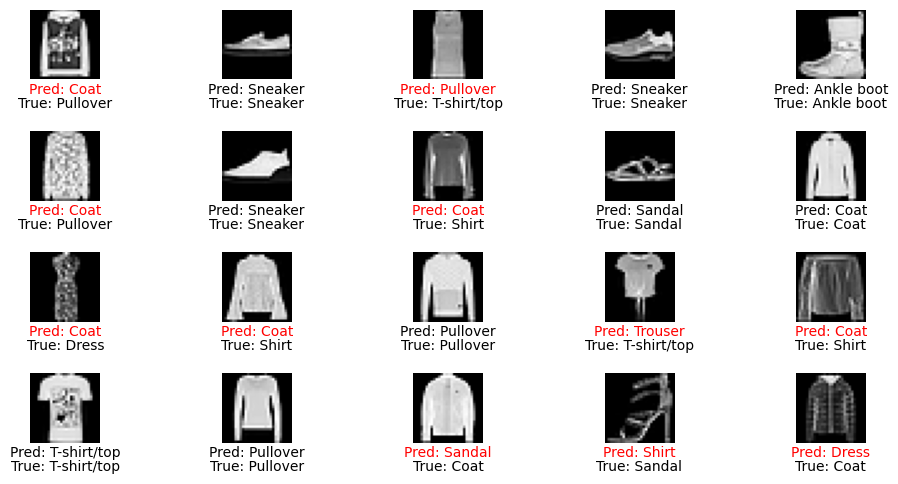

In [4]:
# Define label names for Fashion MNIST
label_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]
# Visualizing predictions with labels
plt.figure(figsize=(10, 5))
for i in range(20):  # Display 20 images
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_test_flat[i].reshape(28, 28), cmap='gray')

    # Get the predicted and true labels
    pred_label = label_names[y_pred_classes[i]]
    # Use .iloc for integer-based indexing in Pandas Series
    true_label = label_names[y_test.iloc[i]]

    # Set the title to show label names
    # Check if the prediction is correct and set color accordingly
    if y_pred_classes[i] != y_test.iloc[i]:
        plt.text(0.5, -0.2, f"Pred: {pred_label}", color='red', ha='center', fontsize=10, transform=plt.gca().transAxes)
    else:
        plt.text(0.5, -0.2, f"Pred: {pred_label}", color='black', ha='center', fontsize=10, transform=plt.gca().transAxes)

    # Always display the true label in black
    plt.text(0.5, -0.4, f"True: {true_label}", color='black', ha='center', fontsize=10, transform=plt.gca().transAxes)

    plt.axis('off')

plt.tight_layout()
plt.show()